In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb



Text(0, 0.5, 'Force (kN)')

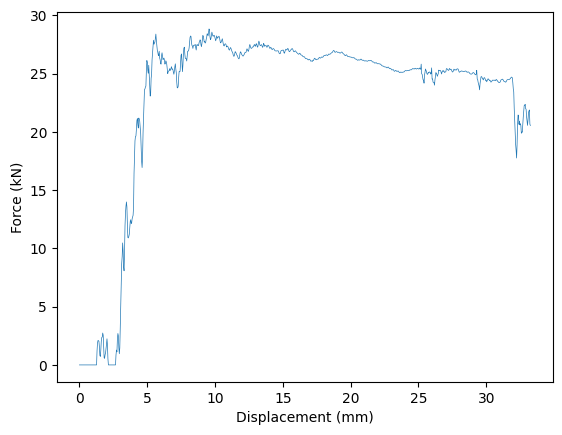

In [16]:
for i in range(1, 2):
    df = pd.read_csv('Simulation_BENDING/Results/BENDING_X_data.csv/BENDING_'+str(i)+'_data.csv')
    plt.plot(df['DMM'], df['FKN'], linewidth=0.5)
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (kN)')


In [17]:
parameters = pd.read_csv('Simulation_BENDING/parameters_v1.csv')
combined_df = pd.DataFrame()
for i in range(100):
    new_data = pd.read_csv('Simulation_BENDING/Results/BENDING_X_data.csv/BENDING_'+str(i+1)+'_data.csv')
    for parameter in parameters.columns:
        new_data[parameter] = parameters[parameter][i]
    combined_df = pd.concat([combined_df, new_data])

combined_df.reset_index(drop=True, inplace=True)
combined_df = combined_df.drop(columns=['*time', 'sample'])


In [18]:
combined_df.head()

,DMM,FKN,outer_wall_tickness,inside_wall_side_tickness,inside_wall_middle_tickness,height,width,sigma0,youngs
0,0.000000e+00,0.0,2.5,2.15,1.63,75.95,127.83,263.44,66771.2
1,8.691025e-08,0.0,2.5,2.15,1.63,75.95,127.83,263.44,66771.2
2,1.373822e-06,0.0,2.5,2.15,1.63,75.95,127.83,263.44,66771.2
3,6.835261e-06,0.0,2.5,2.15,1.63,75.95,127.83,263.44,66771.2
4,2.136786e-05,0.0,2.5,2.15,1.63,75.95,127.83,263.44,66771.2


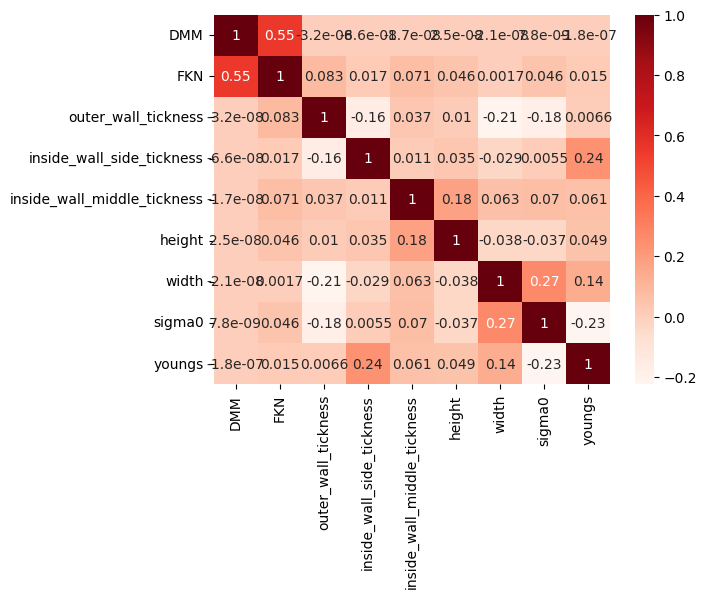

In [20]:
dataplot = sb.heatmap(combined_df.corr(), cmap="Reds", annot=True)  
plt.show() 

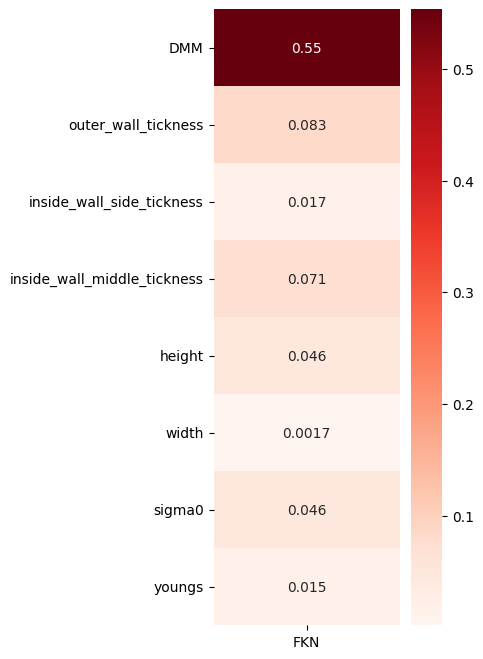

In [25]:
correlation_matrix = combined_df.corr()
fkn_correlation = correlation_matrix[['FKN']].drop('FKN')

plt.figure(figsize=(3, 8))  # Adjust the size to fit your particular needs
sb.heatmap(fkn_correlation, annot=True, cmap='Reds', cbar=True)
plt.show()

In [28]:
mean_force_df = pd.DataFrame()

for i in range(100):
    new_data = pd.read_csv('Simulation_BENDING/Results/BENDING_X_data.csv/BENDING_'+str(i+1)+'_data.csv')
    mean_force = new_data['FKN'].max()
    new_data_df = pd.DataFrame()
    new_data_df['max_force'] = [max_force]
    for parameter in parameters.columns:
        new_data_df[parameter] = parameters[parameter][i]
    max_force_df = pd.concat([max_force_df, new_data_df])

max_force_df.reset_index(drop=True, inplace=True)
max_force_df = max_force_df.drop(columns=['sample'])

max_force_df.head()

,max_force,outer_wall_tickness,inside_wall_side_tickness,inside_wall_middle_tickness,height,width,sigma0,youngs
0,28.824824,2.50,2.15,1.63,75.95,127.83,263.44,66771.2
1,30.512357,2.83,2.02,1.44,75.76,127.25,246.66,69501.7
2,29.328930,2.85,1.78,1.44,76.51,127.53,243.62,65759.5
3,28.711674,2.71,1.72,1.51,75.41,127.61,258.13,65259.4
4,29.108949,2.67,1.74,1.65,76.22,128.53,261.38,65053.8


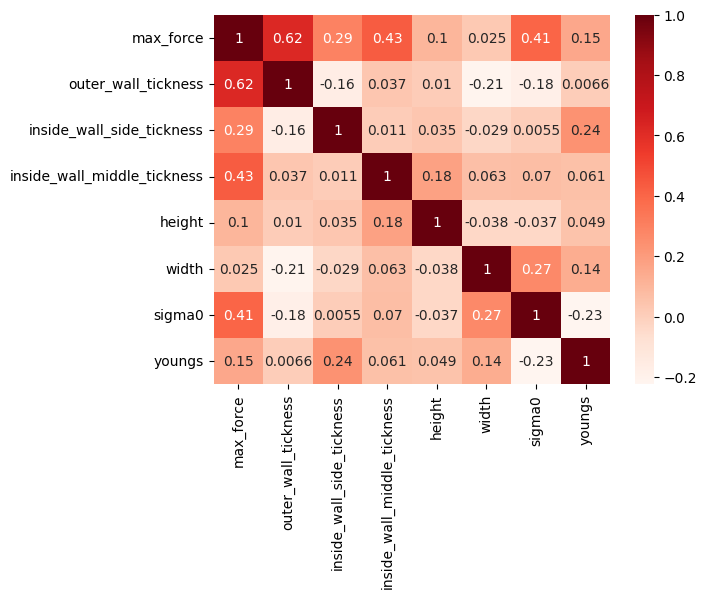

In [29]:
dataplot = sb.heatmap(max_force_df.corr(), cmap="Reds", annot=True)  
plt.show()

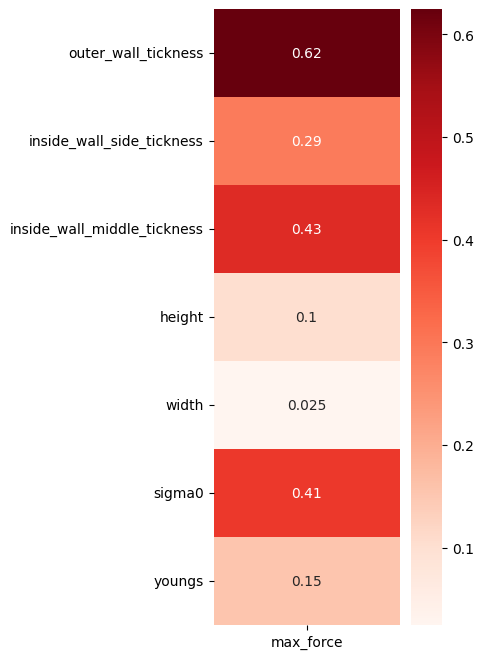

In [31]:
correlation_matrix = max_force_df.corr()
fkn_correlation = correlation_matrix[['max_force']].drop('max_force')

plt.figure(figsize=(3, 8))  # Adjust the size to fit your particular needs
sb.heatmap(fkn_correlation, annot=True, cmap='Reds', cbar=True)
plt.show()

In [32]:
mean_force_df = pd.DataFrame()

for i in range(100):
    new_data = pd.read_csv('Simulation_BENDING/Results/BENDING_X_data.csv/BENDING_'+str(i+1)+'_data.csv')
    mean_force = new_data['FKN'].mean()
    new_data_df = pd.DataFrame()
    new_data_df['mean_force'] = [mean_force]
    for parameter in parameters.columns:
        new_data_df[parameter] = parameters[parameter][i]
    mean_force_df = pd.concat([mean_force_df, new_data_df])

mean_force_df.reset_index(drop=True, inplace=True)
mean_force_df = mean_force_df.drop(columns=['sample'])

mean_force_df.head()

,mean_force,outer_wall_tickness,inside_wall_side_tickness,inside_wall_middle_tickness,height,width,sigma0,youngs
0,21.819472,2.50,2.15,1.63,75.95,127.83,263.44,66771.2
1,22.857998,2.83,2.02,1.44,75.76,127.25,246.66,69501.7
2,23.065457,2.85,1.78,1.44,76.51,127.53,243.62,65759.5
3,21.634743,2.71,1.72,1.51,75.41,127.61,258.13,65259.4
4,22.638904,2.67,1.74,1.65,76.22,128.53,261.38,65053.8


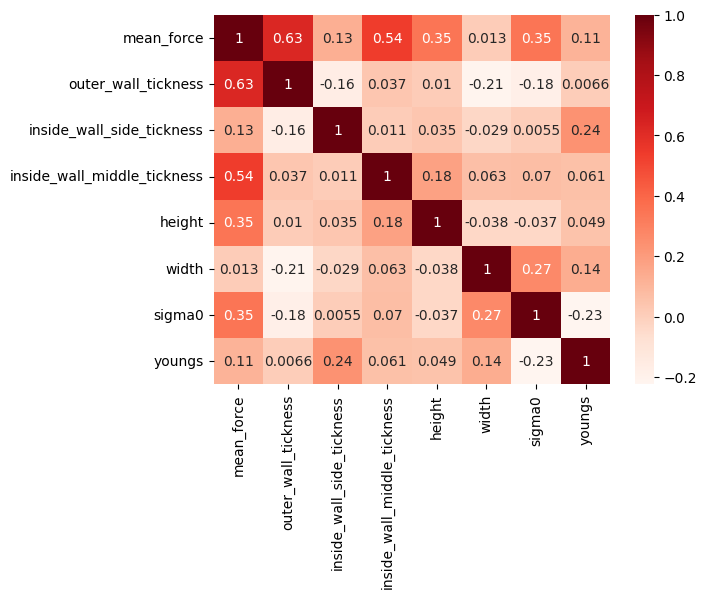

In [33]:
dataplot = sb.heatmap(mean_force_df.corr(), cmap="Reds", annot=True)  
plt.show()

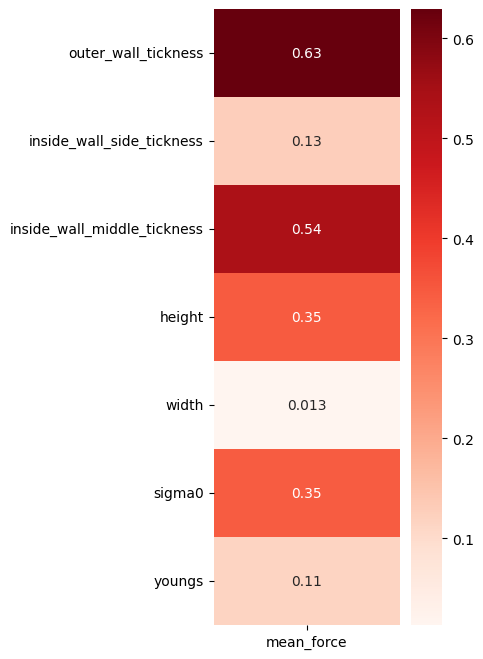

In [34]:
correlation_matrix = mean_force_df.corr()
fkn_correlation = correlation_matrix[['mean_force']].drop('mean_force')

plt.figure(figsize=(3, 8))
sb.heatmap(fkn_correlation, annot=True, cmap='Reds', cbar=True)
plt.show()

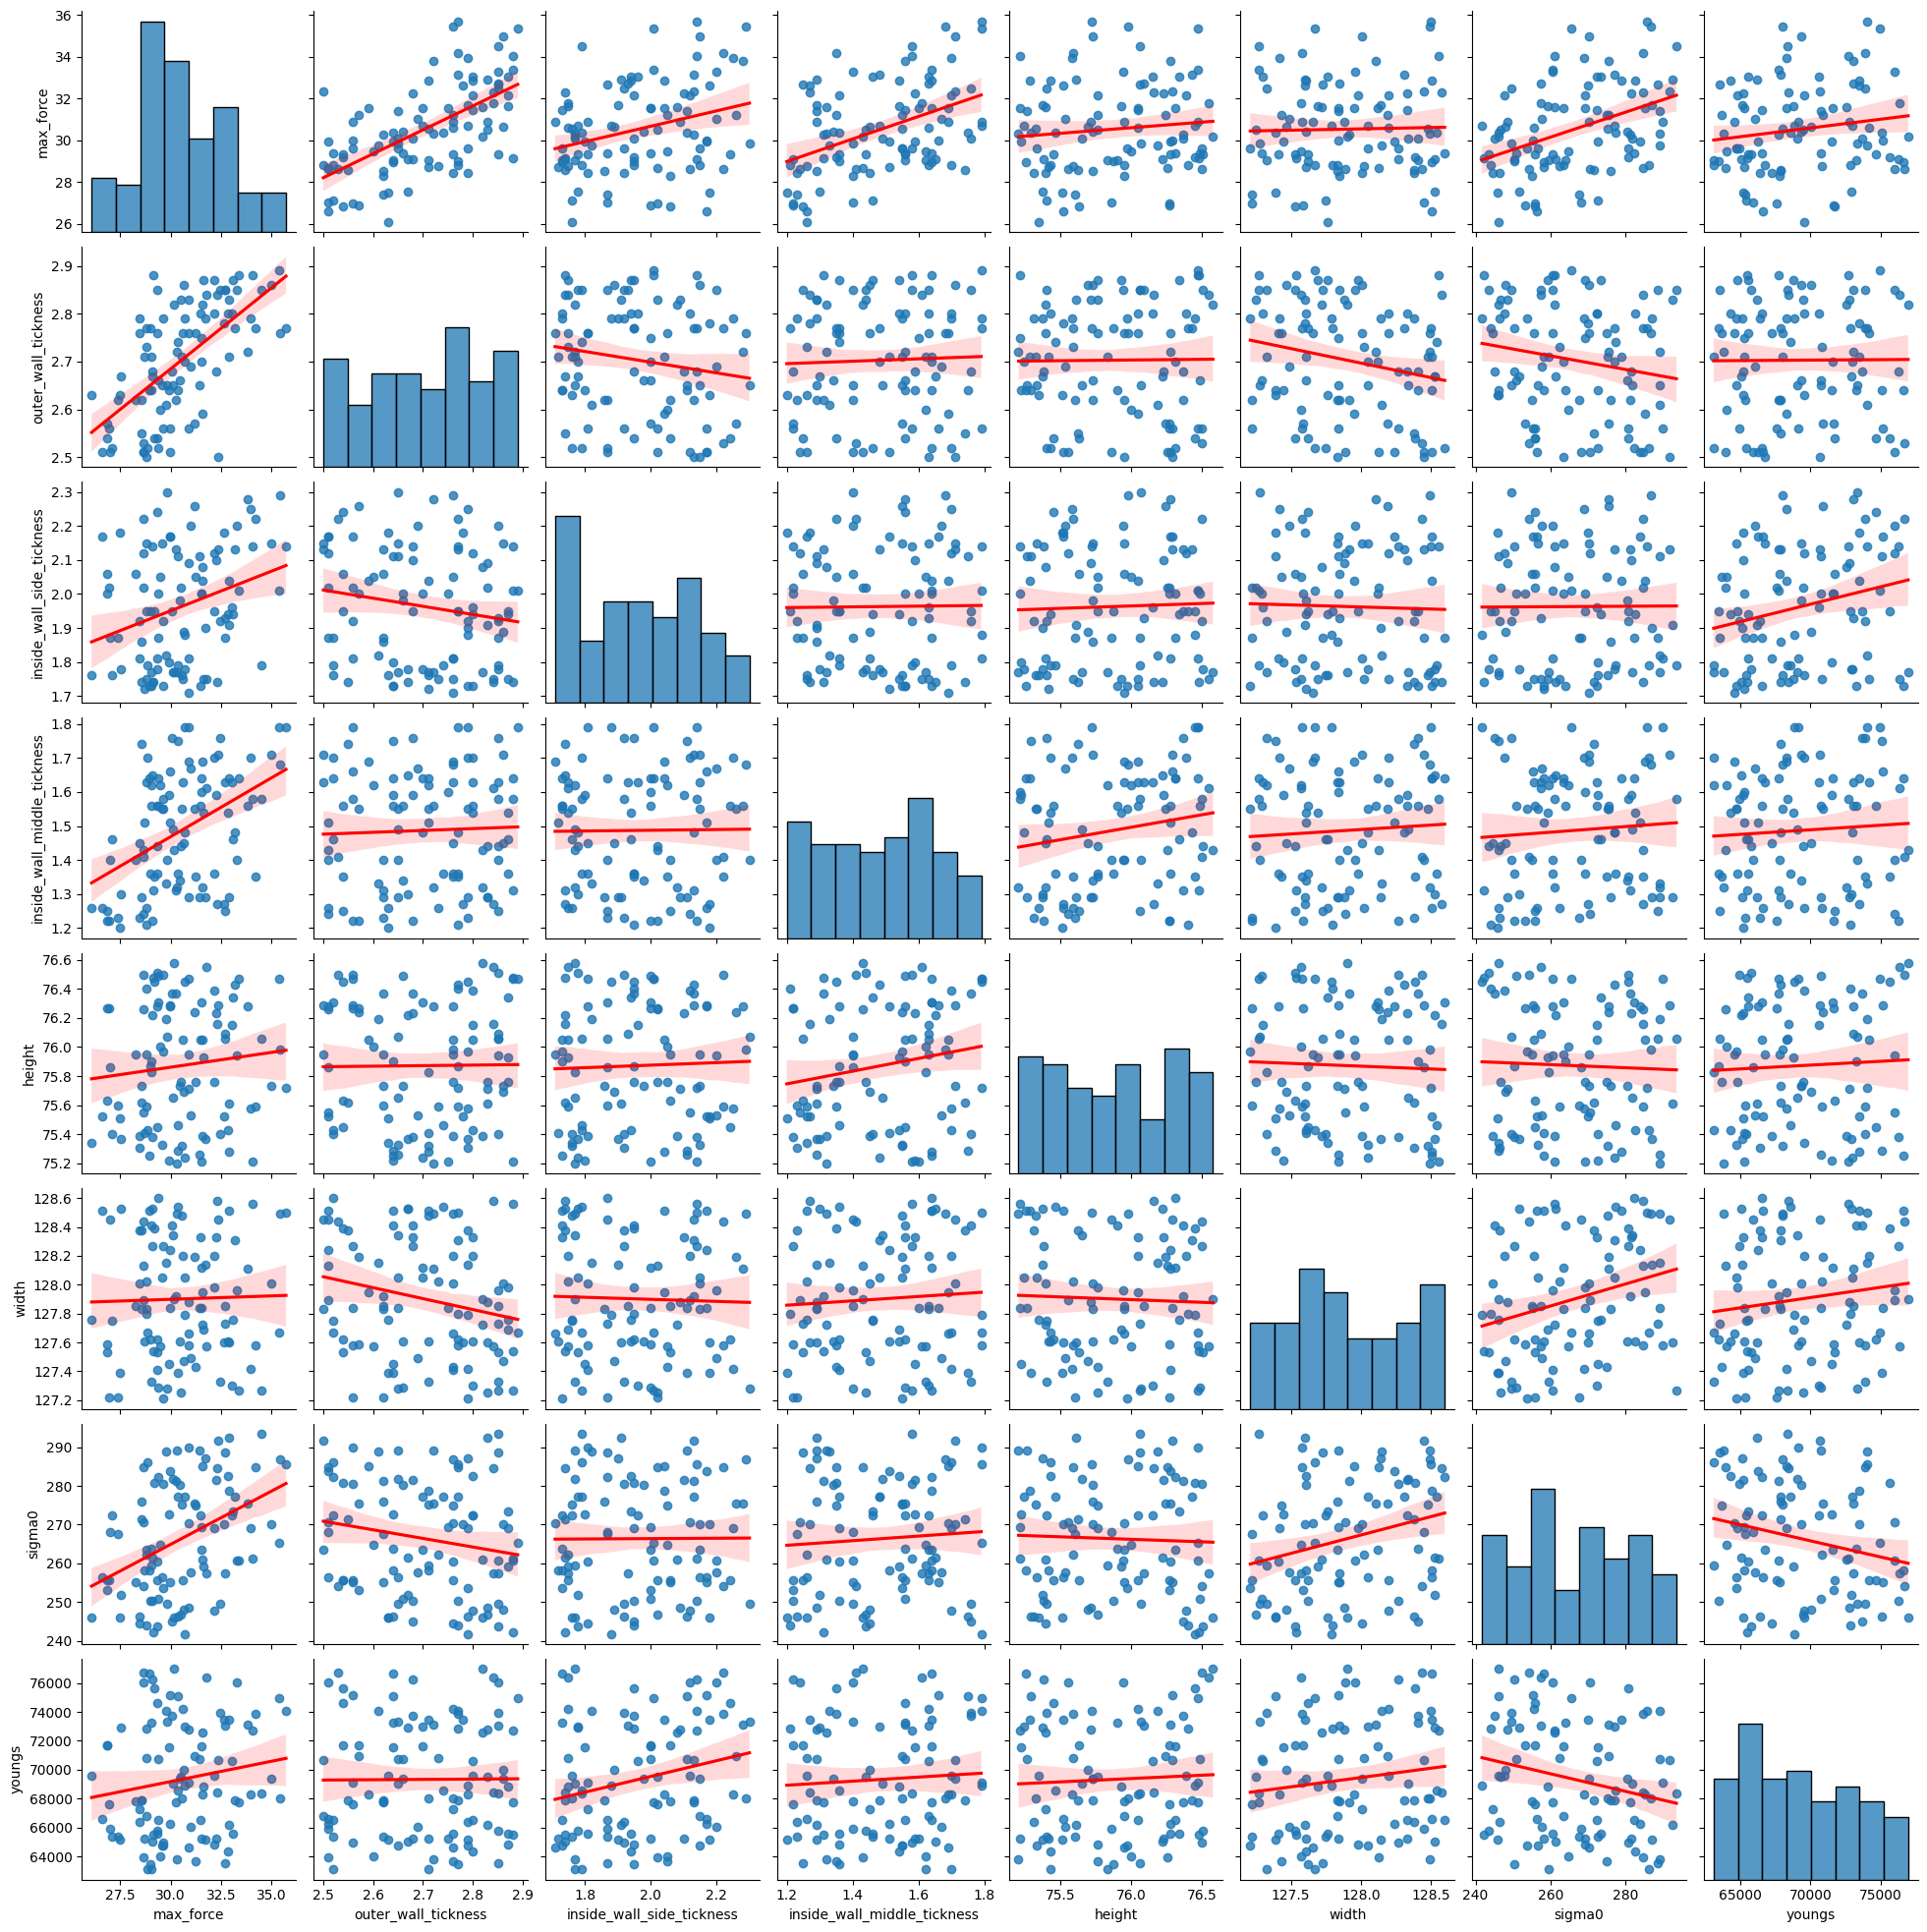

In [47]:
sb.pairplot(max_force_df, kind='reg', plot_kws={'line_kws':{'color':'red'}})